In [16]:
%load_ext autoreload 
%autoreload 2

%aimport -pandas
%aimport -scipy.stats
%aimport -numpy
%aimport -matplotlib.pyplot


import default_calcs as default
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas

In [ ]:
default.default_rate_normal_dist(-2,.3,.01)

In [ ]:
a  = stats.norm.ppf(.01)

In [ ]:
# x = effects of economic driver
x = np.linspace(-3,3,100)

In [ ]:
x_dist = stats.norm.pdf(x)

In [ ]:
plt.plot(x,a_dist)
plt.show()

In [ ]:
defaults= default.default_rate_normal_dist(x,.5,.01)

In [ ]:
plt.plot(x,defaults)
plt.show()

In [ ]:
# cum default probability
cum_def = default.inv_default_rate_normal_dist(.01,.3,defaults)

In [ ]:
df = pandas.DataFrame(data=[defaults,(cum_def)]).T
df.columns=['defaults','cum_def']

In [ ]:
df.tail()

In [ ]:
plt.plot(defaults,x_dist.cumsum())
plt.show()

In [ ]:
len(cum_def)

In [ ]:
import prepayment_calcs as pc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fast_smm = np.random.randint(50,100,size=60)/1000

In [ ]:
a = pc.prepayment_curve_from_passive_active_composition(.09, .8, .01, .2, 60)

In [ ]:
a.plot(a.index,['fast_amount','pool_cpr'])
plt.grid()
plt.show()

In [ ]:
a['total'] = a.fast_amount + a.slow_amount

In [ ]:
a.head()

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
USD_LIBOR = BeautifulSoup(requests.get("http://www.global-rates.com/interest-rates/libor/american-dollar/american-dollar.aspx").text,
                         "html.parser")

In [ ]:
USD_LIBOR.title

In [ ]:
balances = np.array([[50000],[100000],[150000],[200000],[250000]])
coupon = np.array([0.04,0.06,0.08,0.10,0.12,.14])

In [ ]:
df = pd.DataFrame(np.pmt(rate=coupon/12,nper=360,pv=balances)).T

In [ ]:
np.arange(1,10)

In [ ]:
nper=360
pv=400000
cpn=0.055/12
df = pd.DataFrame(data=np.zeros([nper+1,1]),columns=['scheduled_balance'],
                 index =[np.arange(0,nper+1)])
df.loc[0,'scheduled_balance'] = pv

In [ ]:
def scheduled_balances(rate, nper, pv):
    df = pd.DataFrame(data=np.zeros([nper + 1, 1]), columns=['scheduled_balance'],
                      index=[np.arange(0, nper + 1)])
    df.loc[0, 'scheduled_balance'] = pv

    df['bal_percent'] = (1 - ((((1 + rate) ** np.array(df.index)) - 1) /
                           (((1 + rate) ** df.index.max()) - 1)))

    df.loc[:, 'scheduled_balance'] = df['bal_percent'] * df.loc[0,'scheduled_balance']

    return df

In [ ]:
df1 = scheduled_balances(0.055/12,360,400000)

In [ ]:
def scheduled_balance_percent(rate, nper, age):
    return (1 - ((((1 + rate) ** age) - 1) /
          (((1 + rate) ** nper) - 1)))

In [ ]:
scheduled_balance_percent(0.06/12,360,60)

In [ ]:
coupon = list([0.06, 0.08, 0.10])
age = list([60,120,180,240,300,359])

In [ ]:
results = []
for i in coupon:
    column = []
    for j in age:
        column.append(scheduled_balance_percent(i/12, 360, j))
    results.append(column)

In [ ]:
df = pd.DataFrame(results).T
df.columns=coupon
df.index=age

In [ ]:
df

In [ ]:
df = pd.DataFrame(data=np.zeros([nper + 1, 1]), columns=['scheduled_balance'],
                      index=[np.arange(0, nper + 1)])
df.loc[0, 'scheduled_balance'] = pv

In [ ]:
rate = 0.055
nper = 360

df['bal_percent'] = df.reset_index()['index'].apply(lambda x: 
                                                    scheduled_balance_percent(
                                                    rate/12, nper, x))

In [ ]:
def scheduled_balances(rate, nper, pv):
    """ Returns data frame of scheduled balances and each periods scheduled balance as a %
    of the original balance"""

    df = pd.DataFrame(data=np.zeros([nper + 1, 1]), columns=['scheduled_balance'],
                      index=[np.arange(0, nper + 1)])
    df.loc[0, 'scheduled_balance'] = pv

    df['bal_percent'] = df.reset_index()['index'].apply(lambda x:
                                                        scheduled_balance_percent(
                                                            rate / 12, nper, x))

    df.loc[:, 'scheduled_balance'] = df['bal_percent'] * df.loc[0,'scheduled_balance']

    return df

In [ ]:
def scheduled_balances(rate, nper, pv):
    """ Returns data frame of scheduled balances and each periods scheduled balance as a %
    of the original balance"""

    df = pd.DataFrame(data=np.zeros([nper + 1, 1]), columns=['scheduled_balance'],
                      index=[np.arange(0, nper + 1)])
    df.loc[0, 'scheduled_balance'] = pv
    
    df['bal_percent'] = (1 - (((1 + rate/12) ** np.array(df.index) - 1) / 
                        ((1 + rate/12) ** nper - 1)))

    df.loc[:, 'scheduled_balance'] = df['bal_percent'] * df.loc[0,'scheduled_balance']

    return df

In [ ]:
%time df = scheduled_balances(0.055, 358, 400000000)

In [ ]:
df.head()

In [ ]:
df = pd.DataFrame(data=np.zeros([nper + 1, 1]), columns=['scheduled_balance'],
                      index=[np.arange(0, nper + 1)])
df.loc[0, 'scheduled_balance'] = pv
df.loc[1:,'interest'] = np.ipmt(cpn/12,per=nper,pv=df.loc[1:].shift(-1))

In [ ]:
import collateral_waterfall as cw
import prepayment_calcs as pc
import numpy as np
import pandas as pd

In [ ]:
a=pc.cpr_curve_creator()

In [ ]:
factor = []
factor.append(1-pc.SMM(a[0]))

for i in range(1,len(a)):
    factor.append(factor[i-1] * (1-pc.SMM(a[i])))

In [ ]:
sched = cw.schedule_of_ending_balances(0.09, 360, 200000)['scheduled_balance']

In [ ]:
sched.head()

In [ ]:
waterfall = cw.create_waterfall(original_balance=4e8, pass_thru_cpn=0.055,
                                psa_speed=0,wam=360, wac=0.055)

In [ ]:
waterfall.tail()

In [ ]:
cpr = pc.cpr_curve_creator()

In [ ]:
smm = [0.01]*360

In [ ]:
age = 361-len(sched)
ab = sched['scheduled_balance'][:-1] * (1-0.01)

In [ ]:
ab.head()

In [ ]:
sched['scheduled_balance'][:-1].tail()

In [ ]:
import collateral_waterfall as cw
import prepayment_calcs as pc
import numpy as np
import pandas as pd

scheduled_ending = cw.schedule_of_ending_balances(0.09, 
                                       360, 
                                       150000)['scheduled_balance']

smm = [.01]

actual_ending = cw.actual_balances(scheduled_ending, smm)
df = pd.DataFrame(
    data=[scheduled_ending, actual_ending]).T.fillna(0)
df.columns=['scheduled','actual']
df = df.applymap('${:,.2f}'.format)
print(df.head())

cpr = pc.cpr_curve_creator()
smm = [pc.SMM(.10)]

actual_ending = cw.actual_balances(scheduled_ending, smm)
df = pd.DataFrame(
    data=[scheduled_ending, actual_ending]).T.fillna(0)
df.columns=['scheduled','actual']
df = df.applymap('${:,.2f}'.format)
print(df.head())

In [ ]:
pc.SMM(0.4) * 1.5

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
waterfall = cw.create_waterfall(original_balance=200000, 
                    psa_speed=3, 
                    pass_thru_cpn=0.075, 
                    wac=0.075,
                    wam=360)

In [ ]:
waterfall = {}

figure, axes = plt.subplots()
for i in range(15):
    for j in range(4):
        waterfall[i,j] = cw.create_waterfall(original_balance=200000, 
                        psa_speed=i + (j * 0.25), 
                        pass_thru_cpn=0.075, 
                        wac=0.075,
                        wam=360)
        waterfall[i,j].beginning_balance.plot(ax=axes)
plt.show()

In [ ]:
def arm_coupons(rate_curve, 
                gross_margin, 
                total_fees, 
                initial_coupon,
                periodic_cap):
    df = pd.DataFrame(index=pd.Index(range(len(rate_curve))),
                     columns=['rates','Gross','Net'])
    df.rates=rate_curve
    df.loc[0,'Gross'] = initial_coupon
    
    for i in range(1,df.index.max()+1):
        if df.rates[i] + 1.75 <= df.Gross[i-1] + 1:
            df.loc[i, 'Gross'] = df.rates[i] + 1.75 
        else:
            df.loc[i, 'Gross'] = df.Gross[i-1] + 1 
    
    df.loc[:,'Net'] = df.Gross - total_fees
    
    return df

In [ ]:
rates = [None,8.2,5.,5.75,4.]
df = arm_coupons(rates,1.75,0.65,5.1,1)

In [ ]:
df

In [ ]:
df.plot()
plt.show()

In [ ]:
1e6 * ((1.085) ** (14/365) - 1)

In [ ]:
mey = np.irr([-99,5,105])
mey = 0.0
bey = 2 * ((1+mey/12)**6-1)

In [ ]:
print('%f,%f' % (mey,bey))

In [ ]:
time = np.array([1,2,3,4,5])
principal = np.array([5,10,20,40,80])

In [ ]:
WAL = ((time * principal) / principal.sum()).sum()

In [ ]:
WAL

In [ ]:
def macauley_duration(price, times, cash_flows, yld):
    return (1 / price) * ((times * cash_flows) /
                        (1 + yld/2)**(2*times)).sum()


def modified_duration(duration, yld):
    return duration / (1 + yld/2)


def effective_duration(price, delta_down_price, delta_up_price, yld_delta):
    return (-100/price) * ((delta_down_price - delta_up_price) / (2 * yld_delta))

In [ ]:
duration = macauley_duration(price,times,cash_flows,yld)
modified_duration = modified_duration(duration,yld)

In [ ]:
modified_duration

In [ ]:
effective_duration(100,99.75,100.25,.01)

In [ ]:
speeds = [.5,1,2,5]
curves = [pc.cpr_curve_creator()*np.array(speed) for speed in speeds]

In [ ]:
fig, ax = plt.subplots()
for curve in curves:
    print(ax.plot(curve))

In [ ]:
plt.show()

In [ ]:
def schedule_of_ending_balance_percent_for_period(rate, nper, age):
    return (1. - ((((1 + rate) ** age) - 1.) /
                  (((1 + rate) ** nper) - 1.)))

In [ ]:
def example_matrix_of_balance_outstanding_by_age_and_term():
    coupon = 0.08
    terms = [180,360]
    ages = [24,48,72,96,120,144,168]
    
    df = pd.DataFrame(index=ages, columns=[terms]).unstack()
    
    return results

In [ ]:
results = {}

coupon = 0.08/12.
terms = [180,360]
ages = [24,48,72,96,120,144,168]
    
for term in terms:
    for age in ages:
        results[term,age] = scheduled_balance_percent(
        coupon, term, age)

In [ ]:
results

In [ ]:
original_balance=150000
pass_thru_coupon=0.08
wac=0.08
wam=360

first_wf = cw.create_waterfall(original_balance=original_balance, 
                               pass_thru_cpn=pass_thru_coupon,
                              wac=wac,
                              wam=wam,
                              cpr_description='7')
first_wf['CPR']=first_wf['SMM'].apply(pc.cpr)
first_wf.head()

In [ ]:
original_balance=150000
pass_thru_coupon=0.08
wac=0.08
wam=360

second_wf = cw.create_waterfall(original_balance=original_balance, 
                               pass_thru_cpn=pass_thru_coupon,
                              wac=wac,
                              wam=wam,
                              psa_speed=3)
second_wf['CPR']=second_wf['SMM'].apply(pc.cpr)
second_wf.head()

In [ ]:
def example_matrix_of_balance_outstanding_by_age_and_coupon():
    coupon = list([0.06, 0.08, 0.10])
    age = list([60, 120, 180, 240, 300, 359])

    results = []
    for i in coupon:
        column = []
        for j in age:
            column.append(schedule_of_ending_balance_percent_for_period(i / 12, 360, j))
        results.append(column)

    df = pd.DataFrame(results).T
    df.columns = coupon
    df.index = age
    return df

In [13]:
import numpy as np
import pandas as pd
import bond_pricing as bp

In [14]:
bonds = pd.DataFrame([
    {'Face': 100, 'Maturity': 0.25, 'Coupon': 0, 'Price': 97.50},
    {'Face': 100, 'Maturity': 0.5, 'Coupon': 0, 'Price': 94.90},
    {'Face': 100, 'Maturity': 1.0, 'Coupon': 0, 'Price': 90.00},
    {'Face': 100, 'Maturity': 1.5, 'Coupon': 8, 'Price': 96.00},
    {'Face': 100, 'Maturity': 2.0, 'Coupon': 12, 'Price': 101.60}
])

bonds['coupon_freq'] = 1

bonds = bp.BondPricing(bonds).bonds

In [15]:
bonds = pd.DataFrame([
    {'Face': 100, 'Maturity': 1., 'Coupon': 7, 'Price': 100.},
    {'Face': 100, 'Maturity': 2., 'Coupon': 8, 'Price': 100.},
    {'Face': 100, 'Maturity': 3., 'Coupon': 9, 'Price': 100.},
    {'Face': 100, 'Maturity': 4., 'Coupon': 10, 'Price': 100.}
])

bonds['coupon_freq'] = 1

In [16]:
bonds

,Coupon,Face,Maturity,Price,coupon_freq
0,7,100,1.0,100.0,1
1,8,100,2.0,100.0,1
2,9,100,3.0,100.0,1
3,10,100,4.0,100.0,1


In [126]:
bonds = pd.DataFrame([
    {'Maturity': 1., 'Yield': 7.},
    {'Maturity': 2., 'Yield': 8.},
    {'Maturity': 3., 'Yield': 9.},
    {'Maturity': 4., 'Yield': 10.},
])

In [214]:
def spot_from_par(bonds):
    bonds.loc[0,'spot_rate'] = bonds.loc[0,'Yield']
    for i in np.arange(1,len(bonds)):
        result = 0
        for j in range(i):
            #print(i,j)
            print('{0:.10f} / ( 1 + {1:.10f}/100)**({2:.0f})'.format(bonds.loc[i,'Yield'],
                                                                       bonds.loc[j,'spot_rate'],
                                                                       j+1))
            a = bonds.loc[i,'Yield'] / (1. + bonds.loc[j,'spot_rate']/100.)**(j + 1.)
            result += a
        bonds.loc[i,'spot_rate'] = (((100.+bonds.loc[i,'Yield']) / (100. - result)) ** (1./ (i+1.)) - 1.) * 100
    return bonds

In [215]:
a = spot_from_par(bonds)

8.0000000000 / ( 1 + 7.0000000000/100)**(1)
9.0000000000 / ( 1 + 7.0000000000/100)**(1)
9.0000000000 / ( 1 + 8.0403964854/100)**(2)
10.0000000000 / ( 1 + 7.0000000000/100)**(1)
10.0000000000 / ( 1 + 8.0403964854/100)**(2)
10.0000000000 / ( 1 + 9.1252553099/100)**(3)


In [216]:
a

,Maturity,Yield,spot_rate
0,1.0,7.0,7.000000
1,2.0,8.0,8.040396
2,3.0,9.0,9.125255
3,4.0,10.0,10.272363


In [190]:
9.0000000000 / ( 1 + 8.0403964854/100.)**(1 + 1)

7.710280373834972

In [203]:
c ** .5

1.080403964854224

In [166]:
9/b + 9.0000000000 / ( 1 + 8.0403964854/100)**(1 + 1)

16.121495327106

In [64]:
b= 1.07

In [65]:
c = (108 / (100 - (8 / b)))

In [66]:
d = (109 / (100 - (9/c + 9/b)))

In [75]:
e = (110 / (100 - (10/d + 10/c + 10/b)))

In [77]:
a

,Maturity,Yield,spot_rate
0,1.0,7.0,7.000000
1,2.0,8.0,8.040396
2,3.0,9.0,9.127757
3,4.0,10.0,10.284585


In [76]:
print(b, c**.5, d**(1/3),e**.25 )

1.07 1.080403964854224 1.0912525530985964 1.102723634972019


In [11]:
import collateral_waterfall as cw
import prepayment_calcs as pc
import bond_pricing as bp
import scipy.interpolate as interpolate

In [15]:
spot_curve = bp.BondPricing.spot_from_par()

8.0000000000 / ( 1 + 7.0000000000/100)**(1)
9.0000000000 / ( 1 + 7.0000000000/100)**(1)
9.0000000000 / ( 1 + 8.0403964854/100)**(2)
10.0000000000 / ( 1 + 7.0000000000/100)**(1)
10.0000000000 / ( 1 + 8.0403964854/100)**(2)
10.0000000000 / ( 1 + 9.1252553099/100)**(3)


In [108]:
def forward_rates(spot_curve):
    maturities = spot_curve['Maturity']
    spots = spot_curve['spot_rate']
    
    if len(maturities) != len(spots):
        raise AttributeError('maturity and rate vector lengths must match')

    size = len(spots) -1
    forward = maturities[1:] - maturities[0]
    forward.name = 'Forward'
    print(forward)
    frame = pd.DataFrame(np.full((size,size),np.nan),columns=forward,index=maturities[:-1])

    for i in range(len(maturities)-1):
        for j in range(1,len(maturities)):
            #print(i,j)
            try:
                r2 = spots[i+j] / 100
                r1 = spots[i] / 100
                t2 = maturities[i+j]
                t1 = maturities[i]

                forward_rate = ((((1 + r2)**t2) / ((1 + r1)**t1)) ** (1/(t2-t1)) - 1) * 100
                frame.loc[t2-t1, t1] = forward_rate
                #print('r2: {}\nr1: {}\nt2: {}\nt1:{}'.format(r2,r1,t2,t1))
            except:
                pass
                #print('loop')

    return frame

In [109]:
forwards = forward_rates(spot_curve)

1    1.0
2    2.0
3    3.0
Name: Forward, dtype: float64


In [110]:
spot_curve2 = spot_curve.copy()
spot_curve2.loc[2,'spot_rate'] = 11
spot_curve2.loc[3,'Maturity'] = 10
forwards = forward_rates(spot_curve2)

1    1.0
2    2.0
3    9.0
Name: Forward, dtype: float64


In [103]:
forwards

Forward,1.0,2.0,9.0,3.0
Maturity,,,,
1.0,9.090909,17.164650,NaN,NaN
2.0,13.055730,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN
9.0,10.642082,NaN,NaN,NaN
8.0,NaN,10.837523,NaN,NaN
7.0,NaN,NaN,NaN,9.961981


In [2]:
import xlwings as xw
import collateral_waterfall as cw
wb = xw.Book('mbs waterfall.xlsx')

FileNotFoundError: No such file: 'mbs waterfall.xlsx'

In [50]:
sheet1 = wb.sheets(1)
values = sheet1.range('B1:B6').value

balance = values[0]
WAM = int(values[1])
WAC = values[2]
ptc = values[3]
speed = values[4]
cpr = values[5]

anchor = sheet1.range('A9')

waterfall = cw.create_waterfall(original_balance=balance,
                               wam=WAM,
                               wac=WAC,
                               pass_thru_cpn=ptc,
                               psa_speed=speed,
                               cpr_description=cpr)
anchor.expand().value = ""
anchor.value = waterfall

In [51]:
plt.close()
ax = waterfall['beginning_balance'].plot()
fig = ax.get_figure()

In [52]:
sheet1.pictures.add(fig, name='Adam',update=True)

<Picture 'Adam' in <Sheet [mbs waterfall.xlsx]Sheet1>>

In [53]:
wb = xw.Book()

In [142]:
OneYear = wb.sheets(1).range('OneYear').expand().options(pd.DataFrame).value
ThirtyYear = wb.sheets(1).range('ThirtyYear').expand().options(pd.DataFrame).value
OneYear.head()

,Yield
Date,
1995-02-13,6.82
1995-02-14,6.73
1995-02-15,6.64
1995-02-16,6.57
1995-02-17,6.61


In [141]:
plt.close()
ax1=None
ax2=None
fig1=None
fig2=None
ax1 = (OneYear/OneYear.shift(1)-1).plot()
ax1 = (ThirtyYear/ThirtyYear.shift(1)-1).plot(ax=ax1)
ax2 = (OneYear/OneYear[:1].values[0]).plot()
ax2 = (ThirtyYear/ThirtyYear[:1].values[0]).plot(ax=ax2)

fig1 = ax1.get_figure()
fig2 = ax2.get_figure()

wb.sheets(1).pictures.add(fig1)
wb.sheets(1).pictures.add(fig2)


<Picture 'Picture 26' in <Sheet [Book1]Sheet1>>

In [245]:
from IPython import display
def ex_4_3(quotes):
    df = pd.DataFrame(data=quotes,index=quotes.index, columns=['Yield'])
    df['Y_i/Y_i-1'] = quotes / quotes.shift(1)
    df['ln(Y_i/Y_i-1)'] = np.log(df['Y_i/Y_i-1'])
    stats = df.describe()
    stats.loc['ann_std'] = stats.ix['std'] * np.sqrt(250)
    stats = stats.loc[['mean','std','ann_std']]
    SD_in_BP = stats.loc['mean','Yield'] * stats.loc['ann_std','ln(Y_i/Y_i-1)'] * 100
    return df, stats, SD_in_BP

In [248]:
df, stats, SD_in_BP = ex_4_3(OneYear)
display.display(df, stats, SD_in_BP)
df, stats, SD_in_BP = ex_4_3(ThirtyYear)
display.display(df, stats, SD_in_BP)


,Yield,Y_i/Y_i-1,ln(Y_i/Y_i-1)
Date,,,
1995-02-13,6.82,NaN,NaN
1995-02-14,6.73,0.986804,-0.013284
1995-02-15,6.64,0.986627,-0.013463
1995-02-16,6.57,0.989458,-0.010598
1995-02-17,6.61,1.006088,0.006070
1995-02-20,6.60,0.998487,-0.001514
1995-02-21,6.65,1.007576,0.007547
1995-02-22,6.46,0.971429,-0.028988
1995-02-23,6.50,1.006192,0.006173


,Yield,Y_i/Y_i-1,ln(Y_i/Y_i-1)
mean,6.605000,0.994227,-0.005854
std,0.113847,0.011921,0.012029
ann_std,1.800077,0.188490,0.190192


1.2562178068871441

,Yield,Y_i/Y_i-1,ln(Y_i/Y_i-1)
Date,,,
1995-02-13,7.67,NaN,NaN
1995-02-14,7.61,0.992177,-0.007853
1995-02-15,7.56,0.993430,-0.006592
1995-02-16,7.57,1.001323,0.001322
1995-02-17,7.59,1.002642,0.002639
1995-02-20,7.59,1.000000,0.000000
1995-02-21,7.61,1.002635,0.002632
1995-02-22,7.54,0.990802,-0.009241
1995-02-23,7.55,1.001326,0.001325


,Yield,Y_i/Y_i-1,ln(Y_i/Y_i-1)
mean,7.582000,0.997965,-0.002047
std,0.041580,0.004692,0.004707
ann_std,0.657436,0.074195,0.074424


0.5642855091055845

,Yield,Y_i/Y_i-1,ln(Y_i/Y_i-1)
Date,,,
1995-02-13,6.82,NaN,NaN
1995-02-14,6.73,0.986804,-0.013284
1995-02-15,6.64,0.986627,-0.013463
1995-02-16,6.57,0.989458,-0.010598
1995-02-17,6.61,1.006088,0.006070
1995-02-20,6.60,0.998487,-0.001514
1995-02-21,6.65,1.007576,0.007547
1995-02-22,6.46,0.971429,-0.028988
1995-02-23,6.50,1.006192,0.006173


,Yield,Y_i/Y_i-1,ln(Y_i/Y_i-1)
mean,6.605000,0.994227,-0.005854
std,0.113847,0.011921,0.012029
ann_std,1.800077,0.188490,0.190192


1.2562178068871441

In [238]:
6.605000 * 0.190192

1.25621816

In [259]:
106 / (1+ 0.057 * np.exp(.40) )

97.692790494455949

In [272]:
x1 = np.array([1,5,9])
x2 = np.array([4,5,6])

In [280]:
print('\tSet1\tSet2')
print('avg:\t{}\t{}'.format(x1.mean(),x2.mean()))
print('1/av(x)\t{}\t{}'.format(1/x1.mean(),1/x2.mean()))
print('1/av(x)\t{:.2f}\t{:.2f}'.format(np.mean(1/x1),np.mean(1/x2)))

	Set1	Set2
avg:	5.0	5.0
1/av(x)	0.2	0.2
1/av(x)	0.44	0.21


In [281]:
1/x1

array([ 1.        ,  0.2       ,  0.11111111])

In [282]:
np.mean(1/x1)

0.43703703703703706

In [283]:
0.057 * np.exp(.4)

0.085034007765552408

In [284]:
prepay_sheet = wb.sheets('prepays')

In [308]:
CPR_diff = prepay_sheet.range('X1').expand().options(pd.DataFrame).value

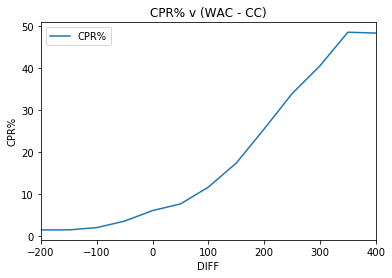

In [331]:
ax = CPR_diff.plot()
fig = ax.get_figure()
ax.set_title('CPR% v (WAC - CC)')
ax.set_xlabel('DIFF')
ax.set_ylabel('CPR%')
prepay_sheet.pictures.add(fig, name='CPR_DIFF', update=True, 
                          width=600, height=300)
plt.show()

In [346]:
CPRs = prepay_sheet.range('N1').expand().options(pd.DataFrame).value
Rates = prepay_sheet.range('D1').expand().options(pd.DataFrame).value

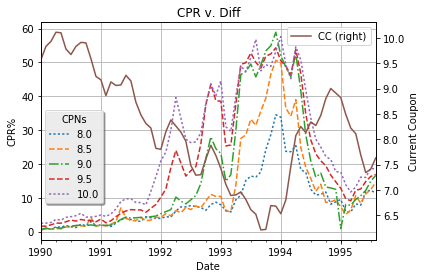

In [455]:
linestyles = [':','--','-.','--',':']
fig, ax = plt.subplots()
for col, linestyle in zip(CPRs.columns, linestyles):
    CPRs[col].plot(linestyle=linestyle, ax=ax, legend=False)
ax1 = Rates.plot(ax=ax, secondary_y=True, legend=True)
ax.set_ylabel('CPR%')
ax1.set_ylabel('Current Coupon')
ax.grid()
ax.set_title('CPR v. Diff')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=labels,shadow=True,
          fancybox=True, bbox_to_anchor=(0.25,0.60), title='CPNs')
prepay_sheet.pictures.add(fig,name='fig1',update=True)
plt.show()

In [21]:
group = pd.groupby(CPRs,by=[CPRs.index.month])

NameError: name 'CPRs' is not defined

In [244]:
ex5_9 = pd.read_json('{"Current Coupon":{"0":8,"1":7,"2":6,"3":8,"4":9,"5":7},"WAC":{"0":9,"1":9,"2":9,"3":10,"4":7,"5":14},"Age":{"0":24,"1":50,"2":75,"3":50,"4":10,"5":120},"Factor":{"0":0.9,"1":0.8,"2":0.7,"3":0.6,"4":0.8,"5":0.4},"Month":{"0":"Jan","1":"Jul","2":"Mar","3":"Feb","4":"Oct","5":"Nov"}}')
seasonality = pd.read_json('{"Month":{"0":"Jan","1":"Feb","2":"Mar","3":"Apr","4":"May","5":"Jun","6":"Jul","7":"Aug","8":"Sep","9":"Oct","10":"Nov","11":"Dec","12":"Average"},"Average":{"0":4.8725,"1":4.6275,"2":6.165,"3":6.505,"4":7.0975,"5":7.565,"6":7.2825,"7":8.4375,"8":6.95,"9":6.945,"10":5.84,"11":5.72,"12":6.5025},"Factor":{"0":0.749526683,"1":0.711838836,"2":0.948349308,"3":1.000650811,"4":1.091793871,"5":1.163708437,"6":1.120252041,"7":1.297923323,"8":1.069104248,"9":1.068335108,"10":0.898355224,"11":0.87989587,"12":1.000266241}}')

In [125]:
seasonality.loc[seasonality['Month'] == 'Jan','Factor'][0]

0.74952668300000003

In [114]:
def age_perc(age, e=30):
    return min(age/e, 1)

In [251]:
def simple_model(current_coupon, wac, age, burn, month):
    diff = (wac - current_coupon) * 100
    interest_effect = interest_rate_effect(0.5,
                                             0.06,
                                             200,
                                             .006,
                                             diff)
    seasonal = seasonality.loc[seasonality['Month'] == month
                               ,'Factor'].values[0]
    features = {'Interest': interest_effect[4],
           'Age': age_perc(age=age),
           'Burnout': burn_perc(factor=burn),
           'Seasonal': seasonal}
    
    return features

In [252]:
def burn_perc(factor, f=0.7):
    return 1 - f * (1 - factor)

In [253]:
def interest_rate_effect(max_CPR, min_CPR, midpoint_diff, max_slope, diff=0):
    a = (max_CPR + min_CPR) / 2
    b = (max_CPR - a) / (np.pi/2)
    d = max_slope/b
    c = -d * midpoint_diff
    try:
        result = a + b * (np.arctan(c + d * diff))
    except Exception as e:
        print(e)
        result = 0
    return a, b, c, d, result 

In [254]:
a, b, c, d, result = interest_rate_effect(0.5,0.06,200,.006,100)

In [255]:
results = pd.DataFrame(columns=['Interest',
                                'Age',
                                'Burnout',
                                'Seasonal',
                                'Total'])

results = results.append(list(ex5_9.apply(lambda x: simple_model(x['Current Coupon'],
                                       x['WAC'],
                                       x['Age'],
                                       x['Factor'],
                                       x['Month']), axis=1)),
              ignore_index=True)
results['Total'] = results.apply(lambda x:
                                x['Interest'] * x['Age']
                                * x['Burnout'] * x['Seasonal'],
                                axis=1)

results

,Interest,Age,Burnout,Seasonal,Total
0,0.092118,0.800000,0.93,0.749527,0.051369
1,0.280000,1.000000,0.86,1.120252,0.269757
2,0.467882,1.000000,0.79,0.948349,0.350535
3,0.280000,1.000000,0.72,0.711839,0.143507
4,0.068164,0.333333,0.86,1.068335,0.020876
5,0.493466,1.000000,0.58,0.898355,0.257119


In [259]:
from IPython import display
print(ex5_9)
print(results)

   Age  Current Coupon  Factor Month  WAC
0   24               8     0.9   Jan    9
1   50               7     0.8   Jul    9
2   75               6     0.7   Mar    9
3   50               8     0.6   Feb   10
4   10               9     0.8   Oct    7
5  120               7     0.4   Nov   14
   Interest       Age  Burnout  Seasonal     Total
0  0.092118  0.800000     0.93  0.749527  0.051369
1  0.280000  1.000000     0.86  1.120252  0.269757
2  0.467882  1.000000     0.79  0.948349  0.350535
3  0.280000  1.000000     0.72  0.711839  0.143507
4  0.068164  0.333333     0.86  1.068335  0.020876
5  0.493466  1.000000     0.58  0.898355  0.257119
